In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import metrics

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')

# Reading and Data Preparation

In [2]:
data = pd.read_csv(r"C:\Users\anant\Downloads\DS3_CS2_SP6_Hackathon_House_Data_HackathonBrief.csv")
print(data.shape)
print(data.dtypes)

(1460, 81)
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


In [3]:
data.shape

(1460, 81)

In [4]:
data['AgeWhenSold']=data['YrSold']-data['YearBuilt']
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,AgeWhenSold
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,5
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,31
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,7
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,91
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,8


In [5]:
req_df=data[['LotFrontage','GrLivArea','LotArea','GarageArea','AgeWhenSold','SalePrice']]
req_df

,LotFrontage,GrLivArea,LotArea,GarageArea,AgeWhenSold,SalePrice
0,65.0,1710,8450,548,5,208500
1,80.0,1262,9600,460,31,181500
2,68.0,1786,11250,608,7,223500
3,60.0,1717,9550,642,91,140000
4,84.0,2198,14260,836,8,250000
...,...,...,...,...,...,...
1455,62.0,1647,7917,460,8,175000
1456,85.0,2073,13175,500,32,210000
1457,66.0,2340,9042,252,69,266500
1458,68.0,1078,9717,240,60,142125


In [6]:
k=req_df[(req_df['GrLivArea']>2600)|(req_df['LotArea']>40000)]
k

,LotFrontage,GrLivArea,LotArea,GarageArea,AgeWhenSold,SalePrice
53,68.0,1842,50271,894,25,385000
58,66.0,2945,13682,641,0,438780
112,77.0,2696,9965,792,0,383970
118,90.0,3222,12376,594,20,320000
161,110.0,2668,13688,726,5,412500
...,...,...,...,...,...,...
1353,56.0,3238,14720,666,15,410000
1360,51.0,2601,9842,621,87,189000
1373,NaN,2633,11400,804,6,466500
1386,80.0,2784,16692,564,28,250000


In [7]:
i=k.index

In [8]:
data1=req_df.drop(labels=i,axis=0)
data1

,LotFrontage,GrLivArea,LotArea,GarageArea,AgeWhenSold,SalePrice
0,65.0,1710,8450,548,5,208500
1,80.0,1262,9600,460,31,181500
2,68.0,1786,11250,608,7,223500
3,60.0,1717,9550,642,91,140000
4,84.0,2198,14260,836,8,250000
...,...,...,...,...,...,...
1455,62.0,1647,7917,460,8,175000
1456,85.0,2073,13175,500,32,210000
1457,66.0,2340,9042,252,69,266500
1458,68.0,1078,9717,240,60,142125


In [9]:
data1.isnull().sum()

LotFrontage    244
GrLivArea        0
LotArea          0
GarageArea       0
AgeWhenSold      0
SalePrice        0
dtype: int64

In [10]:
data1.dtypes

LotFrontage    float64
GrLivArea        int64
LotArea          int64
GarageArea       int64
AgeWhenSold      int64
SalePrice        int64
dtype: object

In [11]:
data1['LotFrontage']=data1['LotFrontage'].fillna(data1['LotFrontage'].median())

## Data Normalisation

In [12]:
mm = MinMaxScaler()

In [13]:
data_tr = data1.copy()
data_tr.iloc[:,:]=mm.fit_transform(data1.iloc[:,:])
data_tr.head(3)

,LotFrontage,GrLivArea,LotArea,GarageArea,AgeWhenSold,SalePrice
0,0.150685,0.607506,0.189133,0.394245,0.036765,0.300993
1,0.202055,0.409713,0.219553,0.330935,0.227941,0.254180
2,0.160959,0.641060,0.263200,0.437410,0.051471,0.327001


In [14]:
data_tr.SalePrice = data.SalePrice
data_tr.head(3)

,LotFrontage,GrLivArea,LotArea,GarageArea,AgeWhenSold,SalePrice
0,0.150685,0.607506,0.189133,0.394245,0.036765,208500
1,0.202055,0.409713,0.219553,0.330935,0.227941,181500
2,0.160959,0.641060,0.263200,0.437410,0.051471,223500


# Simple Linear Regression

In [15]:
x=data_tr[['GrLivArea']]
y=data_tr['SalePrice']

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=4)

In [17]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [18]:
y_pred = reg.predict(x_test)

In [19]:
from sklearn.metrics import mean_squared_error
score=mean_squared_error(y_test,y_pred)
score

2133348525.85741

In [20]:
rmse=score**(0.5)
print('RMSE score for Linear Regression is',rmse) 

RMSE score for Linear Regression is 46188.18599877473


# Multiple Linear Regression

In [21]:
x1=data_tr[['LotFrontage','GrLivArea','LotArea','GarageArea','AgeWhenSold']]
y1=data_tr['SalePrice']

In [22]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.25,random_state=4)

In [23]:
reg.fit(x1_train,y1_train)

LinearRegression()

In [24]:
y1_pred = reg.predict(x1_test)

In [25]:
score=mean_squared_error(y1_test,y1_pred)
rmse=score**(0.5)
print('RMSE score for Multiple LR is',rmse)

RMSE score for Multiple LR is 32932.395642740245


# Deep Learning Model Building for Regression

In [26]:
def compilemodel(units,shape,loss):
    model = tf.keras.Sequential([
        Dense(units,activation='relu',input_shape=[shape]), #HL1
        Dense(units,activation='relu'), #HL2
        Dense(units,activation='relu'), #HL3
        Dense(1,activation='relu') #output layer
    ]) 
    
    #compiling the model

    model.compile(loss=loss,optimizer='adam',metrics=[RMSE]) 
    
    return(model)

In [27]:
class PrintDot(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,lags):
        if epoch%25 == 0:
            print('.',end=' ')


def fitmodel(model,trainx,trainy,epoch,valsplit=0.2):
    errors = model.fit(trainx,trainy,epochs=epoch,validation_split=valsplit,verbose=0,callbacks=[PrintDot()])
    
    errhistory = pd.DataFrame(errors.history)
    return(errhistory)

In [28]:
def plotbestfitline(actual,predicted,modelname=''):
    plt.figure(figsize=(8,5))
    plt.title('Best fit Line'+modelname)
    sns.regplot(x=actual,y=predicted,marker='.',color='yellow',line_kws={'color':'red'})

In [29]:
nodes=30
shape=len(x1_train.columns)

#loss functions
MSE=tf.keras.losses.MeanSquaredError()
MAE=tf.keras.losses.MeanAbsoluteError()
RMSE=tf.keras.metrics.RootMeanSquaredError()

In [30]:
EPOCHS =500
m1 = compilemodel(nodes,shape,MSE)

In [31]:
e1 = fitmodel(m1,x1_train,y1_train,EPOCHS)

. . . . . . . . . . . . . . . . . . . . 

In [32]:
e1=e1.rename(columns={'loss':'train_loss','root_mean_squared_error':'train_rmse',
                      'val_root_mean_squared_error':'val_rmse'})

In [33]:
e1['epoch']=e1.index

In [34]:
def predictY(model,testx,testy):
    predictions = model.predict(testx).flatten() #convert pred into 1d array
    
    df=pd.DataFrame({'actual':testy,'predicted':predictions,'err':testy-predictions})
    return(df)

In [35]:
df1 = predictY(m1,x1_test,y1_test)
df1.head(10)

,actual,predicted,err
1028,105000,127784.593750,-22784.593750
762,215200,221727.328125,-6527.328125
950,129000,134372.703125,-5372.703125
143,204000,211569.062500,-7569.062500
1348,215000,211622.796875,3377.203125
60,158000,194433.328125,-36433.328125
776,221500,254495.140625,-32995.140625
687,148800,172453.546875,-23653.546875
1088,137500,193436.640625,-55936.640625
13,279500,244448.515625,35051.484375


In [36]:
def printMSE(actual,predicted,modelname):
    mse=mean_squared_error(df1.actual,df1.predicted)
    print('model {} Epoch={}\n\tMSE={}\n\tRMSE={}'.format(modelname,EPOCHS,mse,np.sqrt(mse)))
    return(mse)

In [37]:
mse1=printMSE(df1.actual,df1.predicted,'m1')
mse1

model m1 Epoch=500
	MSE=1092974834.5209827
	RMSE=33060.16991064902


1092974834.5209827

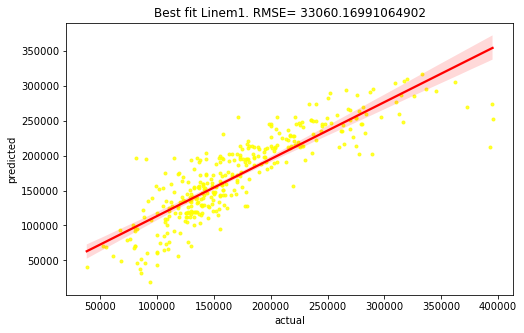

In [38]:
plotbestfitline(df1.actual,df1.predicted,'m1. RMSE= '+str(np.sqrt(mse1)))

# DL Model for single predictor and single regressor variable

In [39]:
nodes=30
shape=len(x_train.columns)

In [40]:
EPOCHS =500
m2 = compilemodel(nodes,shape,MSE)

In [41]:
e2 = fitmodel(m2,x_train,y_train,EPOCHS)

. . . . . . . . . . . . . . . . . . . . 

In [42]:
e2=e2.rename(columns={'loss':'train_loss','root_mean_squared_error':'train_rmse',
                      'val_root_mean_squared_error':'val_rmse'})

In [43]:
e2['epoch']=e2.index

In [44]:
df2 = predictY(m2,x_test,y_test)
df2.head(10)

,actual,predicted,err
1028,105000,167059.187500,-62059.187500
762,215200,184699.937500,30500.062500
950,129000,114240.078125,14759.921875
143,204000,179954.484375,24045.515625
1348,215000,179232.343750,35767.656250
60,158000,144569.796875,13430.203125
776,221500,191611.828125,29888.171875
687,148800,138792.703125,10007.296875
1088,137500,201412.250000,-63912.250000
13,279500,179232.343750,100267.656250


In [45]:
mse2=printMSE(df2.actual,df2.predicted,'m2')
mse2

model m2 Epoch=500
	MSE=1092974834.5209827
	RMSE=33060.16991064902


1092974834.5209827

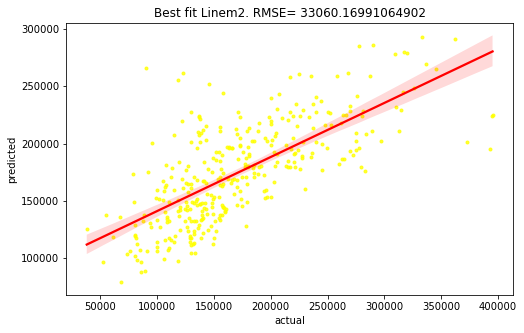

In [46]:
plotbestfitline(df2.actual,df2.predicted,'m2. RMSE= '+str(np.sqrt(mse2)))

### Conclusion:  
RMSE score for Linear Regression is 46188.18599877473  
RMSE score for Multiple LR is 32932.395642740245  
RMSE=183585.4124822736 (multiple regressor values(x))  
RMSE=33060.16991064902 (single regressor value(x))  

### Multiple regressor values with multiple hidden layers model will give less RMSE value